-- select top/bottom 10 publishers by apd
-- conditions: a) > 1000 impressions b) in the pub property list c) > avg apd
(select split_part(domain,'.',-2) as publisher, count(*) as impressions, avg(active_page_dwell) as apd from arion.prod.fact_moat_viewability where active_page_dwell > 
(select avg(active_page_dwell) from arion.prod.fact_moat_viewability)
and split_part(domain,'.',-2) in (select replace(website_url,'.com','') from pub_property_iab)
and publisher is not NULL
group by split_part(domain,'.',-2)
having count(*) > 1000
order by avg(active_page_dwell) desc
limit 10)
union all
(select split_part(domain,'.',-2) as publisher, count(*) as impressions, avg(active_page_dwell) as apd from arion.prod.fact_moat_viewability where active_page_dwell > 
(select avg(active_page_dwell) from arion.prod.fact_moat_viewability)
and split_part(domain,'.',-2) in (select replace(website_url,'.com','') from pub_property_iab)
and publisher is not NULL
group by split_part(domain,'.',-2)
having count(*) > 1000
order by avg(active_page_dwell) asc
limit 10);

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
apd_df = pd.read_csv('D:\\Kargo\\Pub Analysis\\top-bottom-10-apd.csv')
apd_df.describe()

,IMPRESSIONS,APD
count,2.000000e+01,20.000000
mean,1.425401e+06,77319.091350
std,4.052448e+06,48638.571295
min,1.167000e+03,22793.319000
25%,4.338500e+03,34248.426500
50%,8.252900e+04,72152.531000
75%,1.226030e+06,115225.526000
max,1.828041e+07,162599.721000


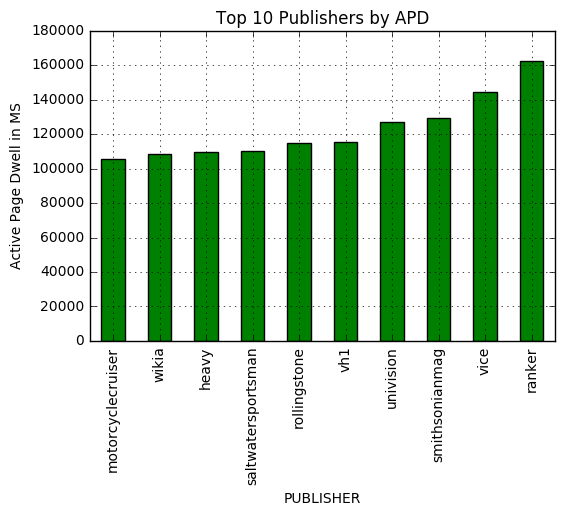

In [63]:
apd_df[:10].pivot_table('APD','PUBLISHER').sort_values(ascending=True).plot \
(kind="bar", title="Top 10 Publishers by APD", grid=True, color=['Green']).set_ylabel("Active Page Dwell in MS")

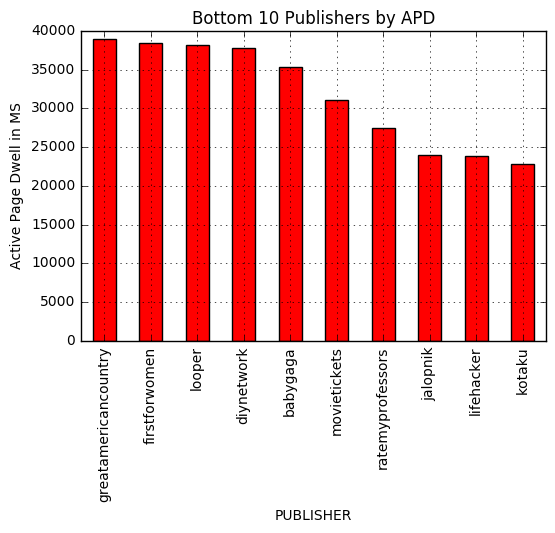

In [62]:
apd_df[10:].pivot_table('APD','PUBLISHER').sort_values(ascending=False).plot \
(kind="bar", title="Bottom 10 Publishers by APD", grid=True, color=['Red']).set_ylabel("Active Page Dwell in MS")

In [17]:
tet_df = pd.read_csv('D:\\Kargo\\Pub Analysis\\top-bottom-10-tet.csv')
tet_df.describe()

,IMPRESSIONS,TET
count,2.000000e+01,20.000000
mean,1.032327e+06,48042.842400
std,2.553884e+06,38335.989616
min,1.451000e+03,7060.354000
25%,2.394750e+04,13194.753250
50%,4.202950e+04,41984.377000
75%,5.029405e+05,78814.768250
max,9.367691e+06,115713.617000


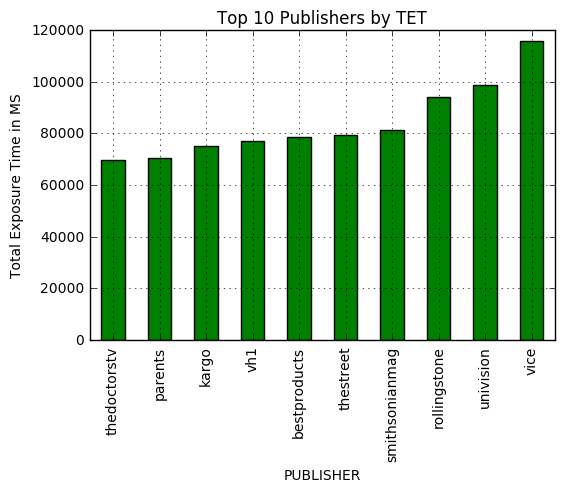

In [60]:
tet_df[:10].pivot_table('TET','PUBLISHER').sort_values(ascending=True).plot \
(kind="bar", title="Top 10 Publishers by TET", grid=True, color=['Green']).set_ylabel("Total Exposure Time in MS")

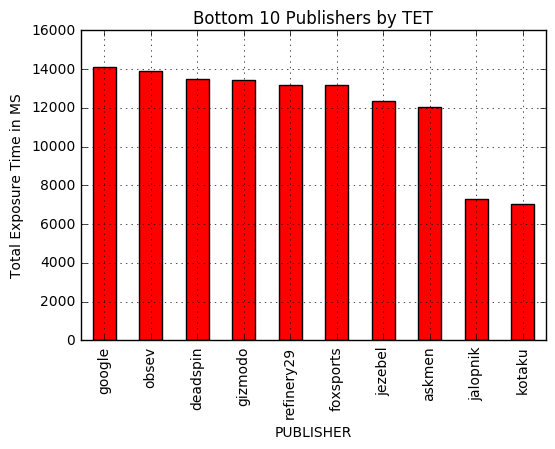

In [61]:
tet_df[10:].pivot_table('TET','PUBLISHER').sort_values(ascending=False).plot \
(kind="bar", title="Bottom 10 Publishers by TET", grid=True, color=['Red']).set_ylabel("Total Exposure Time in MS")

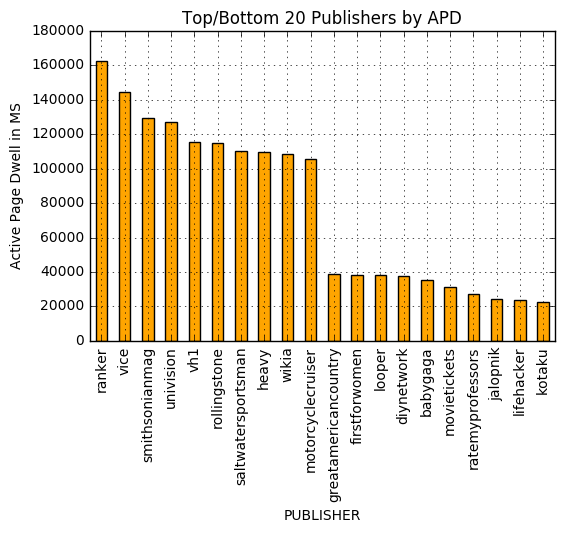

In [56]:
apd_df.pivot_table('APD','PUBLISHER').sort_values(ascending=False).plot \
(kind="bar", title="Top/Bottom 20 Publishers by APD", grid=True, color=['Orange']).set_ylabel("Active Page Dwell in MS")

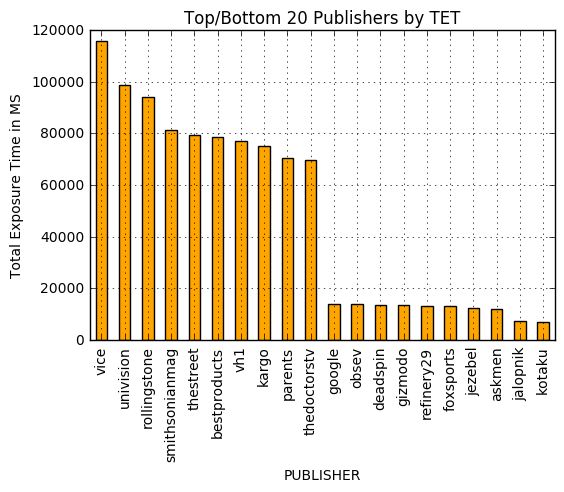

In [55]:
tet_df.pivot_table('TET','PUBLISHER').sort_values(ascending=False).plot(kind="bar", title="Top/Bottom 20 Publishers by TET", grid=True, color=['Orange']).set_ylabel("Total Exposure Time in MS")